<h1><center> Life Expectancy Prediction (Assignment 1) </center></h1>
<center>An End-To-End Machine Learning Project + Causal Inference</center>

# Data

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('life_expectancy.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Structure

In [3]:
df.info()
# Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, 
# Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness 1-19 years, 
# thinness 5-9 years, Income composition of resources, Schooling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
# drop NANs in target variable
df.dropna(subset=['Life expectancy'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [5]:
df["Country"].value_counts()

Romania                                                 16
Turkey                                                  16
Mozambique                                              16
United Kingdom of Great Britain and Northern Ireland    16
Finland                                                 16
                                                        ..
Bulgaria                                                16
Republic of Korea                                       16
Cuba                                                    16
Jordan                                                  16
Cambodia                                                16
Name: Country, Length: 183, dtype: int64

In [6]:
df["Status"].value_counts()

Developing    2416
Developed      512
Name: Status, dtype: int64

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


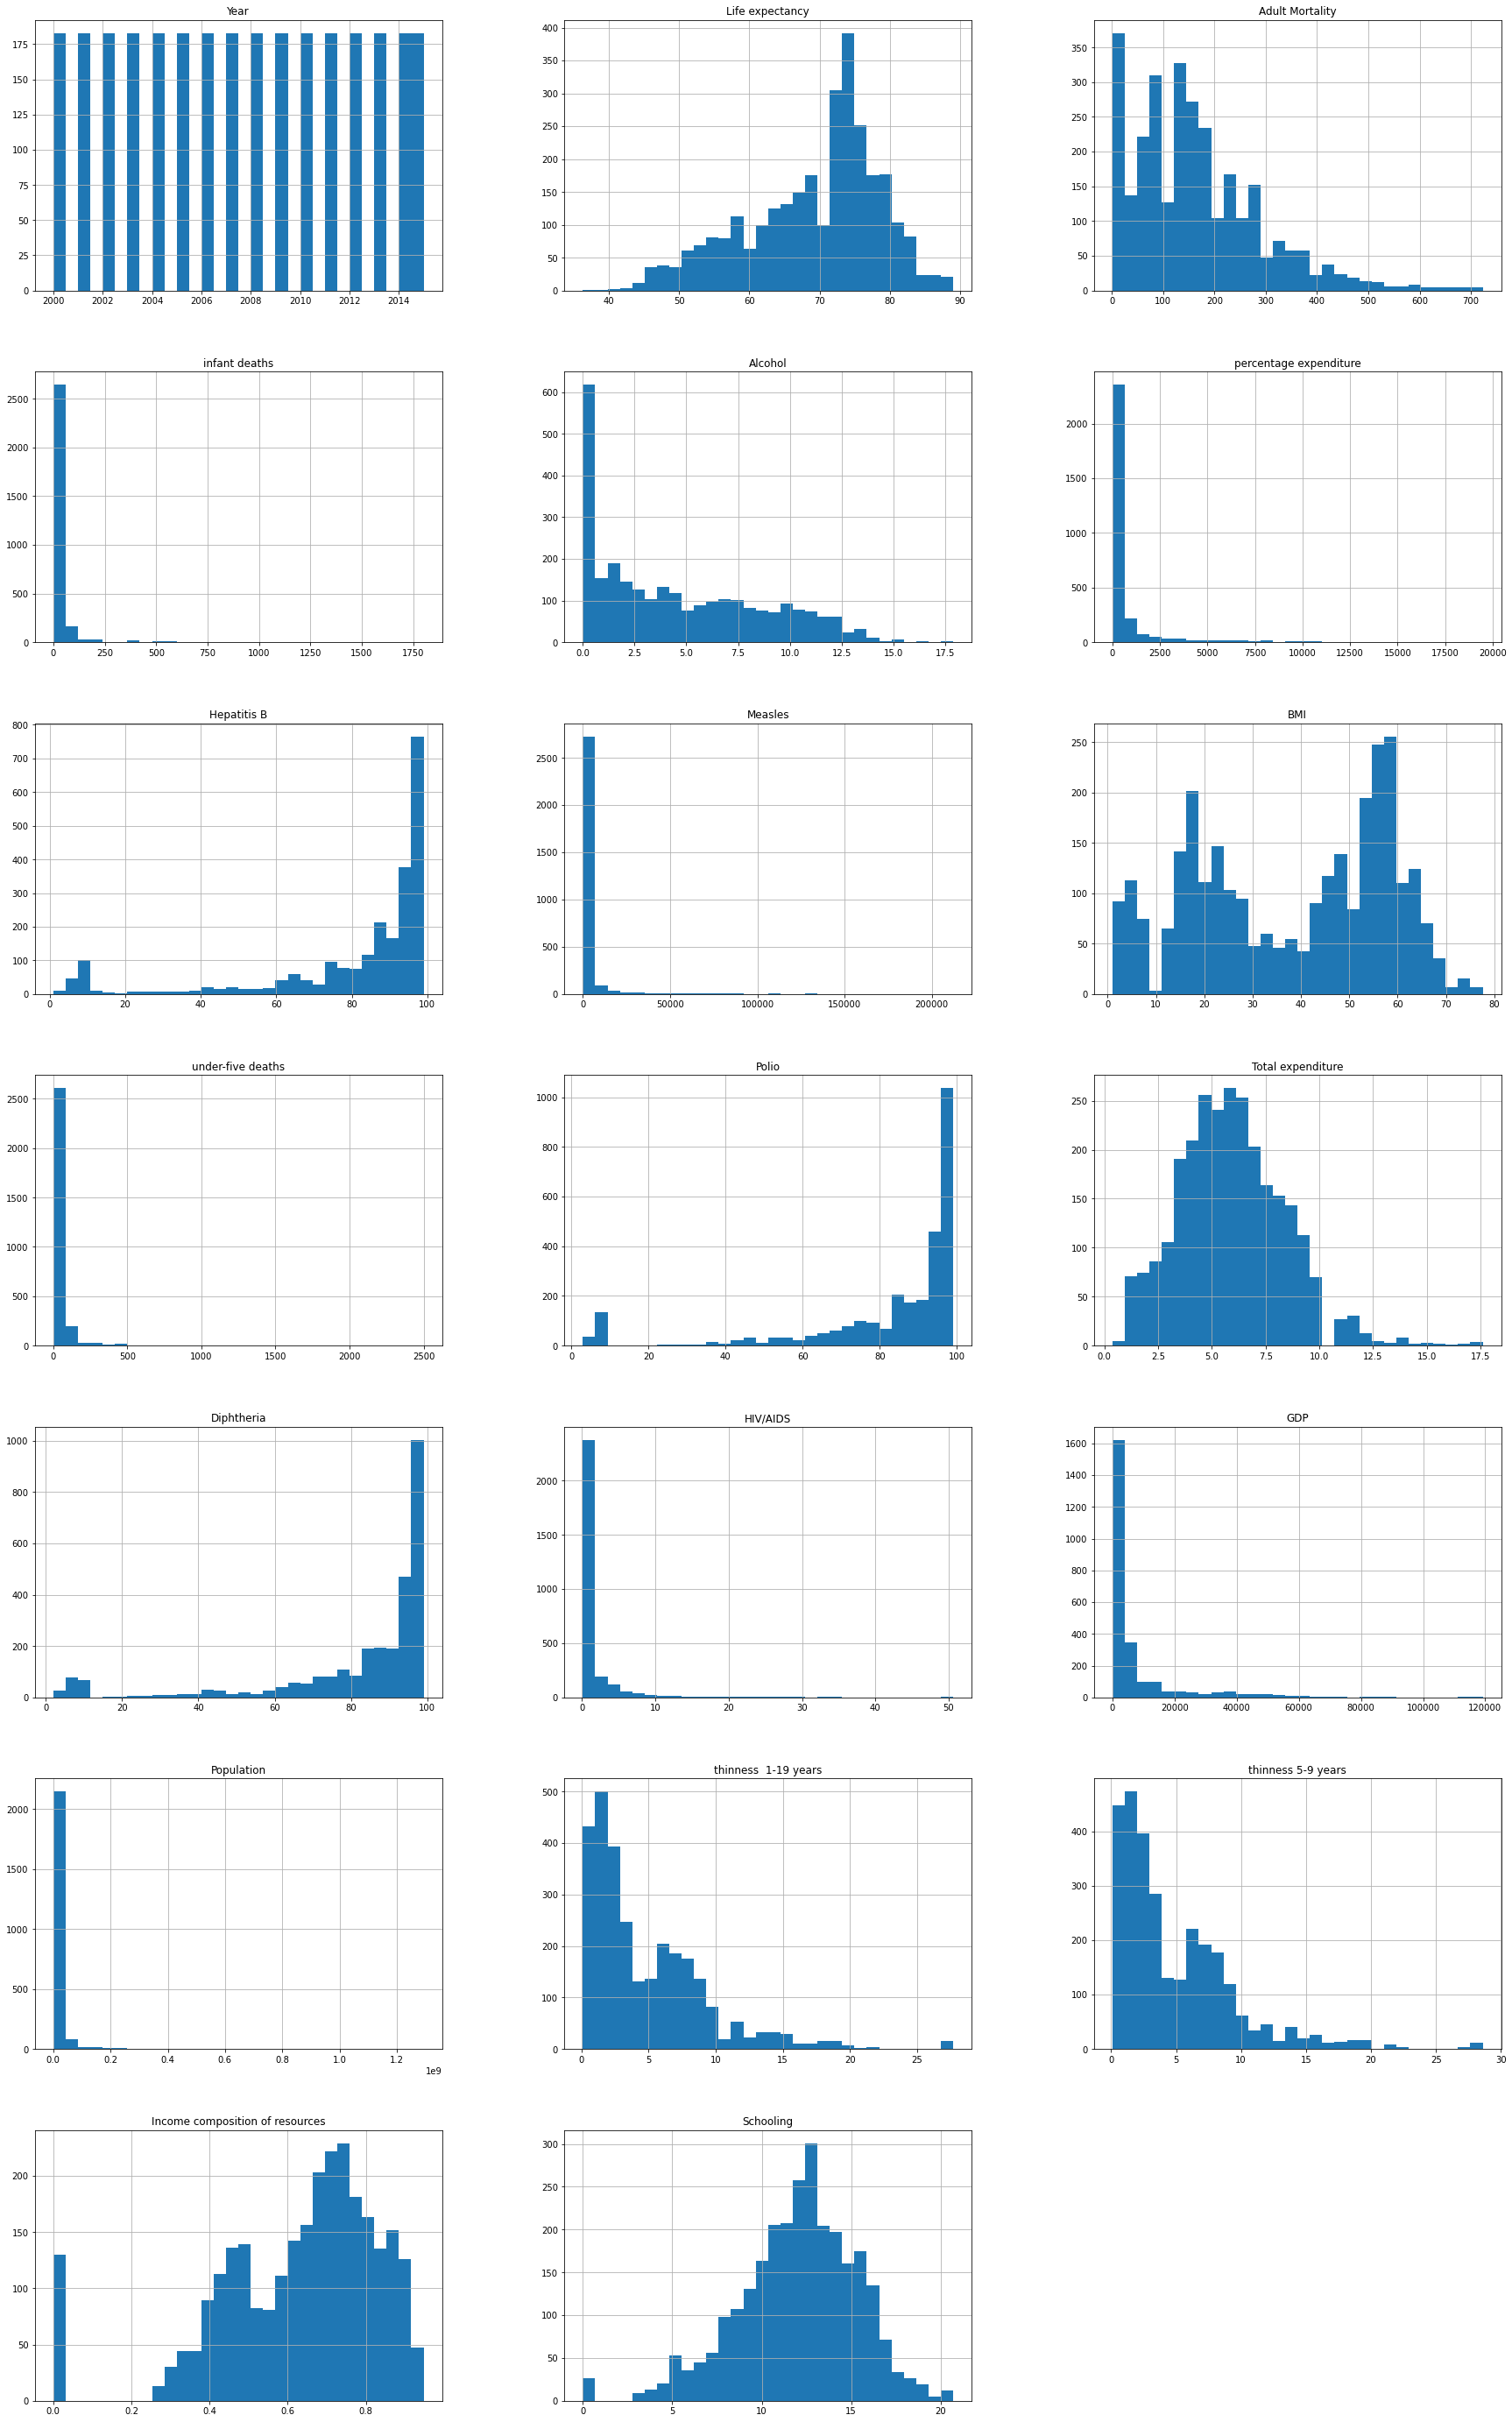

In [8]:
df.hist(bins=30, figsize=(30, 50), layout=(7, 3))
#plt.savefig("histogram_plots")
plt.show()

## Test Set

In [9]:
# to make this notebook's output identical at every run
np.random.seed(25)

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=25)

In [11]:
test_set.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1471,Lebanon,2002,Developing,73.2,17.0,1,1.98,70.132078,77.0,36,...,77.0,1.50,77.0,0.1,5436.595223,3522837.0,4.8,4.7,0.000,15.2
462,Cabo Verde,2001,Developing,73.0,152.0,0,3.81,150.743486,NaN,0,...,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
1420,Kyrgyzstan,2005,Developing,66.9,224.0,4,2.81,0.000000,97.0,53,...,98.0,5.82,98.0,0.1,NaN,NaN,3.4,3.4,0.612,12.4
890,Ethiopia,2007,Developing,58.5,39.0,186,1.06,30.464518,47.0,1446,...,61.0,4.69,5.0,2.8,243.326822,8149.0,11.3,11.0,0.362,7.1
314,Bolivia (Plurinational State of),2005,Developing,65.7,222.0,12,2.86,0.000000,85.0,0,...,84.0,5.67,85.0,0.2,NaN,NaN,1.3,1.2,0.622,14.4


<AxesSubplot:>

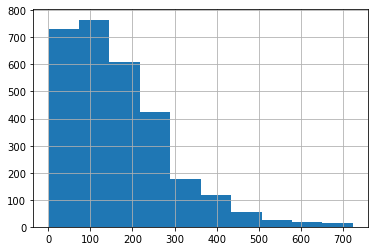

In [12]:
df["Adult Mortality"].hist()

In [13]:
df["mortality_cat"] = pd.cut(df["Adult Mortality"],
                               bins=[0., 100, 200, 300, 400, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [14]:
df["mortality_cat"].value_counts()

1    1068
2     980
3     520
4     214
5     146
Name: mortality_cat, dtype: int64

<AxesSubplot:>

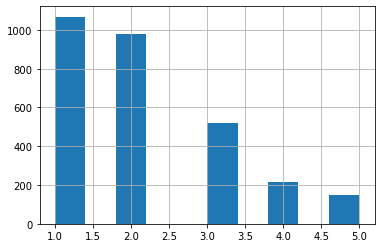

In [15]:
df["mortality_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=25)
for train_index, test_index in split.split(df, df["mortality_cat"]):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [17]:
strat_test_set["mortality_cat"].value_counts() / len(strat_test_set)

1    0.365188
2    0.334471
3    0.177474
4    0.073379
5    0.049488
Name: mortality_cat, dtype: float64

In [18]:
df["mortality_cat"].value_counts() / len(df)

1    0.364754
2    0.334699
3    0.177596
4    0.073087
5    0.049863
Name: mortality_cat, dtype: float64

In [19]:
def mortality_cat_proportions(dataset):
    return dataset["mortality_cat"].value_counts() / len(dataset)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=25)

compare_props = pd.DataFrame({
    "Overall": mortality_cat_proportions(df),
    "Stratified": mortality_cat_proportions(strat_test_set),
    "Random": mortality_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [20]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.364754,0.365188,0.377133,3.393795,0.118879
2,0.334699,0.334471,0.320819,-4.147106,-0.068259
3,0.177596,0.177474,0.180887,1.853505,-0.068259
4,0.073087,0.073379,0.078498,7.403273,0.398711
5,0.049863,0.049488,0.042662,-14.442003,-0.752723


In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("mortality_cat", axis=1, inplace=True)

C:\Users\rebeccamukena\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Discover and Visualize the Data

In [22]:
df = strat_train_set.copy()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1149,Honduras,2004,Developing,72.2,165.0,5,3.02,188.249921,93.0,0,...,94.0,7.89,94.0,1.2,1217.657961,724153.0,2.6,2.5,0.571,10.4
2668,Tunisia,2012,Developing,74.9,13.0,3,1.30,585.877676,97.0,48,...,97.0,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,14.6
567,China,2008,Developing,74.5,97.0,266,4.27,39.225097,95.0,131441,...,99.0,4.59,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,11.9
1775,Mozambique,2004,Developing,54.0,429.0,82,1.54,46.581956,76.0,9396,...,69.0,5.91,83.0,15.9,336.331815,231275.0,3.9,3.8,0.332,7.0
1953,Pakistan,2004,Developing,63.7,183.0,364,0.01,28.983231,65.0,4248,...,65.0,2.56,65.0,0.1,649.848233,15783.0,21.4,21.8,0.474,5.6


## Correlation

In [23]:
corr_matrix = df.corr()

In [24]:
corr_matrix["Life expectancy"].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.748983
Income composition of resources    0.721744
BMI                                0.573401
Diphtheria                         0.480262
GDP                                0.461236
Polio                              0.458374
Alcohol                            0.401546
percentage expenditure             0.380868
Hepatitis B                        0.255061
Total expenditure                  0.217703
Year                               0.170055
Population                        -0.020006
Measles                           -0.146649
infant deaths                     -0.189706
under-five deaths                 -0.214469
thinness 5-9 years                -0.470462
thinness  1-19 years              -0.475006
HIV/AIDS                          -0.550956
Adult Mortality                   -0.694957
Name: Life expectancy, dtype: float64

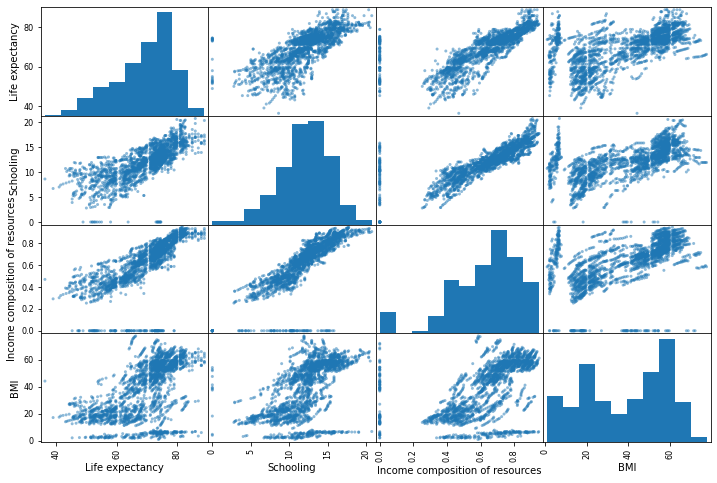

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["Life expectancy", "Schooling", "Income composition of resources", "BMI"]
scatter_matrix(df[attributes], figsize=(12, 8))
#plt.savefig("scatter_matrix_plot")
plt.show()

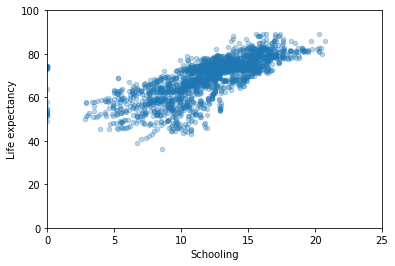

In [26]:
df.plot(kind="scatter", x="Schooling", y="Life expectancy", alpha=0.3)
plt.axis([0, 25, 0, 100])
#plt.savefig("life_expectancy_vs_schooling_scatterplot")
plt.show()

## Experiment with attibute combinations

In [27]:
df["gdp_per_inhabitant"] = df["GDP"]/df["Population"]

In [28]:
corr_matrix = df.corr()
corr_matrix["Life expectancy"].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.748983
Income composition of resources    0.721744
BMI                                0.573401
Diphtheria                         0.480262
GDP                                0.461236
Polio                              0.458374
Alcohol                            0.401546
percentage expenditure             0.380868
Hepatitis B                        0.255061
Total expenditure                  0.217703
Year                               0.170055
gdp_per_inhabitant                 0.063727
Population                        -0.020006
Measles                           -0.146649
infant deaths                     -0.189706
under-five deaths                 -0.214469
thinness 5-9 years                -0.470462
thinness  1-19 years              -0.475006
HIV/AIDS                          -0.550956
Adult Mortality                   -0.694957
Name: Life expectancy, dtype: float64

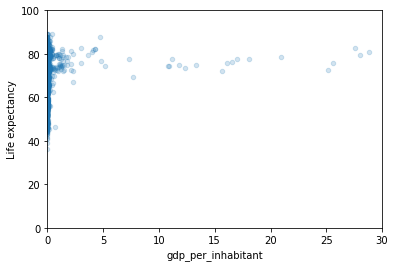

In [29]:
df.plot(kind="scatter", x="gdp_per_inhabitant", y="Life expectancy", alpha=0.2)
plt.axis([0, 30, 0, 100])
plt.show()

In [30]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,gdp_per_inhabitant
count,2342.000000,2342.000000,2342.000000,2342.000000,2193.000000,2342.000000,1892.000000,2342.000000,2315.000000,2342.000000,...,2168.000000,2326.000000,2342.000000,1987.000000,1.833000e+03,2315.000000,2315.000000,2208.000000,2208.000000,1.816000e+03
mean,2007.439368,69.183476,164.988044,31.178907,4.611213,751.429393,81.120507,2458.782664,38.425184,43.139197,...,5.946102,82.570937,1.734159,7565.751244,1.334131e+07,4.848078,4.889590,0.626922,11.993524,4.564827e-01
std,4.610914,9.506054,123.788291,122.114571,4.061114,2009.456406,24.809933,11702.584117,19.900955,166.141781,...,2.509976,23.333909,5.086627,14330.033493,6.676976e+07,4.435832,4.530613,0.212076,3.343027,5.623320e+00
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.370000,3.000000,0.100000,4.613575,3.400000e+01,0.100000,0.100000,0.000000,0.000000,6.801655e-08
25%,2003.000000,63.100000,74.000000,0.000000,0.950000,4.993230,77.000000,0.000000,19.500000,0.000000,...,4.260000,78.000000,0.100000,467.245790,1.912660e+05,1.600000,1.500000,0.494000,10.100000,1.287805e-04
50%,2007.000000,72.000000,144.000000,3.000000,3.710000,67.486520,92.000000,18.000000,43.600000,4.000000,...,5.770000,93.000000,0.100000,1821.878734,1.388115e+06,3.300000,3.300000,0.675000,12.350000,1.272380e-03
75%,2011.000000,75.700000,227.000000,22.000000,7.700000,457.104834,97.000000,362.000000,56.200000,28.000000,...,7.482500,97.000000,0.800000,6197.122699,7.411569e+06,7.200000,7.300000,0.779000,14.300000,1.237056e-02
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,...,17.600000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.882010e+02


# Prepare the Data for Machine Learning Algorithms

In [31]:
df = strat_train_set.drop("Life expectancy", axis=1) # drop labels for training set
data_labels = strat_train_set["Life expectancy"].copy()

## Data Cleaning

In [32]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
717,Democratic People's Republic of Korea,2003,Developing,165.0,12,3.13,0.000000,27.0,0,26.7,...,99.0,NaN,68.0,0.1,NaN,NaN,5.8,5.8,NaN,NaN
1793,Myanmar,2002,Developing,235.0,71,0.41,3.421881,NaN,736,14.6,...,84.0,2.50,79.0,0.4,143.77651,471422.0,13.3,13.7,0.435,7.6
1248,Iraq,2001,Developing,142.0,30,0.17,0.000000,66.0,4088,5.1,...,8.0,NaN,78.0,0.1,NaN,24251649.0,5.6,5.3,0.607,8.7
69,Antigua and Barbuda,2010,Developing,138.0,0,7.84,1983.956937,98.0,0,44.4,...,99.0,5.63,98.0,0.1,12126.87614,NaN,3.3,3.3,0.783,14.1
2359,Slovenia,2001,Developed,124.0,0,10.80,196.302624,NaN,0,51.8,...,93.0,8.57,92.0,0.1,1479.29634,19926.0,2.2,2.2,0.824,14.7


In [33]:
nan_values = df.isna()
nan_columns = nan_values.any()
nan_columns
columns_with_nan = df.columns[nan_columns].to_list()
columns_with_nan

['Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [34]:
sample_incomplete_rows.dropna()    # option 1

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [35]:
sample_incomplete_rows.dropna(axis=1)      # option 2

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
717,Democratic People's Republic of Korea,2003,Developing,165.0,12,3.13,0.000000,0,26.7,15,99.0,68.0,0.1,5.8,5.8
1793,Myanmar,2002,Developing,235.0,71,0.41,3.421881,736,14.6,96,84.0,79.0,0.4,13.3,13.7
1248,Iraq,2001,Developing,142.0,30,0.17,0.000000,4088,5.1,37,8.0,78.0,0.1,5.6,5.3
69,Antigua and Barbuda,2010,Developing,138.0,0,7.84,1983.956937,0,44.4,0,99.0,98.0,0.1,3.3,3.3
2359,Slovenia,2001,Developed,124.0,0,10.80,196.302624,0,51.8,0,93.0,92.0,0.1,2.2,2.2


In [36]:
for col in columns_with_nan:
    median = df[col].median()
    sample_incomplete_rows[col].fillna(median, inplace=True) # option 3

In [37]:
sample_incomplete_rows

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
717,Democratic People's Republic of Korea,2003,Developing,165.0,12,3.13,0.000000,27.0,0,26.7,...,99.0,5.77,68.0,0.1,1821.878734,1388115.0,5.8,5.8,0.675,12.35
1793,Myanmar,2002,Developing,235.0,71,0.41,3.421881,92.0,736,14.6,...,84.0,2.50,79.0,0.4,143.776510,471422.0,13.3,13.7,0.435,7.60
1248,Iraq,2001,Developing,142.0,30,0.17,0.000000,66.0,4088,5.1,...,8.0,5.77,78.0,0.1,1821.878734,24251649.0,5.6,5.3,0.607,8.70
69,Antigua and Barbuda,2010,Developing,138.0,0,7.84,1983.956937,98.0,0,44.4,...,99.0,5.63,98.0,0.1,12126.876140,1388115.0,3.3,3.3,0.783,14.10
2359,Slovenia,2001,Developed,124.0,0,10.80,196.302624,92.0,0,51.8,...,93.0,8.57,92.0,0.1,1479.296340,19926.0,2.2,2.2,0.824,14.70


In [38]:
# check if there is no nan
sample_incomplete_rows.isna().any()

Country                            False
Year                               False
Status                             False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [40]:
categorical_variables = ["Country", "Status"]
data_num = df.drop(columns=categorical_variables, axis=1)
# alternatively: data_num = df.select_dtypes(include=[np.number])

In [41]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([2.00700000e+03, 1.44000000e+02, 3.00000000e+00, 3.71000000e+00,
       6.74865202e+01, 9.20000000e+01, 1.80000000e+01, 4.36000000e+01,
       4.00000000e+00, 9.30000000e+01, 5.77000000e+00, 9.30000000e+01,
       1.00000000e-01, 1.82187873e+03, 1.38811500e+06, 3.30000000e+00,
       3.30000000e+00, 6.75000000e-01, 1.23500000e+01])

In [43]:
data_num.median().values

array([2.00700000e+03, 1.44000000e+02, 3.00000000e+00, 3.71000000e+00,
       6.74865202e+01, 9.20000000e+01, 1.80000000e+01, 4.36000000e+01,
       4.00000000e+00, 9.30000000e+01, 5.77000000e+00, 9.30000000e+01,
       1.00000000e-01, 1.82187873e+03, 1.38811500e+06, 3.30000000e+00,
       3.30000000e+00, 6.75000000e-01, 1.23500000e+01])

In [44]:
X = imputer.transform(data_num)

In [45]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=df.index)

In [46]:
data_tr.loc[sample_incomplete_rows.index.values]

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
717,2003.0,165.0,12.0,3.13,0.000000,27.0,0.0,26.7,15.0,99.0,5.77,68.0,0.1,1821.878734,1388115.0,5.8,5.8,0.675,12.35
1793,2002.0,235.0,71.0,0.41,3.421881,92.0,736.0,14.6,96.0,84.0,2.50,79.0,0.4,143.776510,471422.0,13.3,13.7,0.435,7.60
1248,2001.0,142.0,30.0,0.17,0.000000,66.0,4088.0,5.1,37.0,8.0,5.77,78.0,0.1,1821.878734,24251649.0,5.6,5.3,0.607,8.70
69,2010.0,138.0,0.0,7.84,1983.956937,98.0,0.0,44.4,0.0,99.0,5.63,98.0,0.1,12126.876140,1388115.0,3.3,3.3,0.783,14.10
2359,2001.0,124.0,0.0,10.80,196.302624,92.0,0.0,51.8,0.0,93.0,8.57,92.0,0.1,1479.296340,19926.0,2.2,2.2,0.824,14.70


In [47]:
imputer.strategy

'median'

In [48]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data_num.index)

In [49]:
data_tr.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1149,2004.0,165.0,5.0,3.02,188.249921,93.0,0.0,42.0,7.0,94.0,7.89,94.0,1.2,1217.657961,724153.0,2.6,2.5,0.571,10.4
2668,2012.0,13.0,3.0,1.30,585.877676,97.0,48.0,58.3,3.0,97.0,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,14.6
567,2008.0,97.0,266.0,4.27,39.225097,95.0,131441.0,26.5,308.0,99.0,4.59,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,11.9
1775,2004.0,429.0,82.0,1.54,46.581956,76.0,9396.0,18.1,120.0,69.0,5.91,83.0,15.9,336.331815,231275.0,3.9,3.8,0.332,7.0
1953,2004.0,183.0,364.0,0.01,28.983231,65.0,4248.0,18.4,461.0,65.0,2.56,65.0,0.1,649.848233,15783.0,21.4,21.8,0.474,5.6


## Text and Categorical Attributes

In [50]:
data_cat = df[["Status"]]
data_cat.head(10)

,Status
1149,Developing
2668,Developing
567,Developing
1775,Developing
1953,Developing
2442,Developing
676,Developed
2677,Developing
717,Developing
2929,Developing


In [51]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [52]:
ordinal_encoder.categories_

[array(['Developed', 'Developing'], dtype=object)]

In [53]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<2342x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2342 stored elements in Compressed Sparse Row format>

In [54]:
data_cat_1hot.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [55]:
cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [56]:
cat_encoder.categories_

[array(['Developed', 'Developing'], dtype=object)]

## Custom Transformers

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
gdp_ix, population_ix = 17, 18

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        gdp_per_inhabitant = X[:, gdp_ix] / X[:, population_ix]
        return np.c_[X, gdp_per_inhabitant]

attr_adder = CombinedAttributesAdder()
data_extra_attribs = attr_adder.transform(df.values)

In [58]:
col_names = "GDP", "Population"
gdp_ix, population_ix = [df.columns.get_loc(c) for c in col_names] # get the column indices"

In [59]:
data_extra_attribs = pd.DataFrame(data_extra_attribs, 
                                  columns = list(df.columns)+["gdp_per_inhabitant"], 
                                  index = df.index)
data_extra_attribs.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,gdp_per_inhabitant
1149,Honduras,2004,Developing,165.0,5,3.02,188.249921,93.0,0,42.0,...,7.89,94.0,1.2,1217.657961,724153.0,2.6,2.5,0.571,10.4,1.04
2668,Tunisia,2012,Developing,13.0,3,1.3,585.877676,97.0,48,58.3,...,7.18,97.0,0.1,4137.55421,1886668.0,6.4,6.3,0.717,14.6,1.015873
567,China,2008,Developing,97.0,266,4.27,39.225097,95.0,131441,26.5,...,4.59,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,11.9,1.125
1775,Mozambique,2004,Developing,429.0,82,1.54,46.581956,76.0,9396,18.1,...,5.91,83.0,15.9,336.331815,231275.0,3.9,3.8,0.332,7.0,1.026316
1953,Pakistan,2004,Developing,183.0,364,0.01,28.983231,65.0,4248,18.4,...,2.56,65.0,0.1,649.848233,15783.0,21.4,21.8,0.474,5.6,0.981651


## Transformation Pipeline

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('attribs_adder', CombinedAttributesAdder()), 
        ('std_scaler', StandardScaler()),
    ])

data_pipeline_tr = num_pipeline.fit_transform(data_num)

In [61]:
data_pipeline_tr

array([[-7.46078276e-01,  9.66015980e-05, -2.14425662e-01, ...,
        -2.84576928e-01, -4.97156384e-01, -2.63637378e-02],
       [ 9.89306278e-01, -1.22806851e+00, -2.30807222e-01, ...,
         4.23555973e-01,  7.96623461e-01, -7.43231995e-02],
       [ 1.21614001e-01, -5.49345687e-01,  1.92336787e+00, ...,
         2.05295832e-01, -3.50921539e-02,  1.42598708e-01],
       ...,
       [-7.46078276e-01, -2.74624543e-01, -1.81662543e-01, ...,
        -9.54181395e-02, -4.35547820e-01, -4.27709221e-02],
       [-5.29155207e-01,  4.76818588e-01,  2.68830347e-01, ...,
        -7.98700815e-01, -1.26726343e+00, -1.64339991e-01],
       [-1.17992442e+00, -1.19574838e+00, -2.47188781e-01, ...,
         7.67921972e-01,  1.19707913e+00,  5.56722349e-01]])

In [62]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["Status"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(df)

In [63]:
data_prepared

array([[-7.46078276e-01,  9.66015980e-05, -2.14425662e-01, ...,
        -2.63637378e-02,  0.00000000e+00,  1.00000000e+00],
       [ 9.89306278e-01, -1.22806851e+00, -2.30807222e-01, ...,
        -7.43231995e-02,  0.00000000e+00,  1.00000000e+00],
       [ 1.21614001e-01, -5.49345687e-01,  1.92336787e+00, ...,
         1.42598708e-01,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-7.46078276e-01, -2.74624543e-01, -1.81662543e-01, ...,
        -4.27709221e-02,  0.00000000e+00,  1.00000000e+00],
       [-5.29155207e-01,  4.76818588e-01,  2.68830347e-01, ...,
        -1.64339991e-01,  0.00000000e+00,  1.00000000e+00],
       [-1.17992442e+00, -1.19574838e+00, -2.47188781e-01, ...,
         5.56722349e-01,  1.00000000e+00,  0.00000000e+00]])

In [64]:
data_prepared.shape

(2342, 22)

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [66]:
num_attribs = list(data_num)
cat_attribs = ["Status"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [67]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [68]:
old_data_prepared = old_full_pipeline.fit_transform(df)
old_data_prepared

array([[-7.46078276e-01,  9.66015980e-05, -2.14425662e-01, ...,
        -2.63637378e-02,  0.00000000e+00,  1.00000000e+00],
       [ 9.89306278e-01, -1.22806851e+00, -2.30807222e-01, ...,
        -7.43231995e-02,  0.00000000e+00,  1.00000000e+00],
       [ 1.21614001e-01, -5.49345687e-01,  1.92336787e+00, ...,
         1.42598708e-01,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-7.46078276e-01, -2.74624543e-01, -1.81662543e-01, ...,
        -4.27709221e-02,  0.00000000e+00,  1.00000000e+00],
       [-5.29155207e-01,  4.76818588e-01,  2.68830347e-01, ...,
        -1.64339991e-01,  0.00000000e+00,  1.00000000e+00],
       [-1.17992442e+00, -1.19574838e+00, -2.47188781e-01, ...,
         5.56722349e-01,  1.00000000e+00,  0.00000000e+00]])

In [69]:
old_data_prepared.shape

(2342, 22)

In [70]:
np.allclose(data_prepared, old_data_prepared)

True

# Select and Train Model

## Training and Evaluating on the Training Set

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [72]:
some_data = df.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [68.56362905 76.38588988 72.28926707 49.45053998 62.53962489]


In [73]:
print("Labels:", list(some_labels))

Labels: [72.2, 74.9, 74.5, 54.0, 63.7]


In [74]:
some_data_prepared

array([[-7.46078276e-01,  9.66015980e-05, -2.14425662e-01,
        -3.89797414e-01, -2.80324442e-01,  4.31202116e-01,
        -2.10150830e-01,  1.77628817e-01, -2.17566678e-01,
         4.83235004e-01,  8.10404226e-01,  4.88194563e-01,
        -1.05034811e-01, -4.10115908e-01, -1.69075316e-01,
        -5.05454013e-01, -5.26170609e-01, -2.84576928e-01,
        -4.97156384e-01, -2.63637378e-02,  0.00000000e+00,
         1.00000000e+00],
       [ 9.89306278e-01, -1.22806851e+00, -2.30807222e-01,
        -8.26893440e-01, -8.24039139e-02,  6.07399509e-01,
        -2.06048296e-01,  1.00130437e+00, -2.41647642e-01,
         6.12763813e-01,  5.16386585e-01,  6.17143999e-01,
        -3.21334316e-01, -1.91492546e-01, -1.49457917e-01,
         3.55768711e-01,  3.17028806e-01,  4.23555973e-01,
         7.96623461e-01, -7.43231995e-02,  0.00000000e+00,
         1.00000000e+00],
       [ 1.21614001e-01, -5.49345687e-01,  1.92336787e+00,
        -7.21404190e-02, -3.54502040e-01,  5.19300813e-01,
    

In [75]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.052868355925763

In [76]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(data_labels, data_predictions)
lin_mae

3.003214855104141

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=25)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=25)

In [78]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.5430645609841794e-16

## Better Evaluation Using Cross-Validation

In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [80]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.82418883 2.83594706 2.63173434 2.40739601 2.63480971 2.80233419
 3.02312314 2.6920586  2.5849912  2.99049063]
Mean: 2.7427073708350735
Standard deviation: 0.17965190956094346


In [81]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.74392337 4.09871084 4.33139953 4.29090179 3.92077633 4.49246461
 3.97693543 4.16887828 3.70317055 4.24099588]
Mean: 4.096815661046959
Standard deviation: 0.24496371488482013


In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=25)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=25)

In [83]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.6728949793896446

In [84]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.04716743 1.80411125 1.88192248 1.70099326 1.72120981 2.02199964
 2.00592875 1.78608668 1.56520016 2.0512187 ]
Mean: 1.8585838147731024
Standard deviation: 0.161132055828298


In [85]:
scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      4.096816
std       0.258214
min       3.703171
25%       3.934816
50%       4.133795
75%       4.278425
max       4.492465
dtype: float64

In [86]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_prepared, data_labels)
housing_predictions = svm_reg.predict(data_prepared)
svm_mse = mean_squared_error(data_labels, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.6728949793896446

# Fine-Tune Model

## Grid Search

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=25)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=25),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [89]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=25)

In [90]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.0359694697230935 {'max_features': 2, 'n_estimators': 3}
2.48828812182815 {'max_features': 2, 'n_estimators': 10}
2.253351754196026 {'max_features': 2, 'n_estimators': 30}
2.5396038977855704 {'max_features': 4, 'n_estimators': 3}
2.2528711471547176 {'max_features': 4, 'n_estimators': 10}
2.05346192241532 {'max_features': 4, 'n_estimators': 30}
2.5097759438629574 {'max_features': 6, 'n_estimators': 3}
2.07117989800094 {'max_features': 6, 'n_estimators': 10}
1.9302900567697867 {'max_features': 6, 'n_estimators': 30}
2.462419736897571 {'max_features': 8, 'n_estimators': 3}
2.1058361759513318 {'max_features': 8, 'n_estimators': 10}
1.9622939277462166 {'max_features': 8, 'n_estimators': 30}
2.86324067801794 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.2770852803989445 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.554866780609155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.093133430137077 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [91]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012379,3.374727e-03,0.001207,0.000405,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-9.120611,-9.457202,...,-9.217111,0.265986,18,-2.937219e+00,-2.764368e+00,-2.386931e+00,-2.535224e+00,-2.517302e+00,-2.628209e+00,1.965647e-01
1,0.026023,6.602271e-03,0.003123,0.006246,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-5.989862,-5.902440,...,-6.191578,0.352413,13,-1.313808e+00,-1.224489e+00,-1.241617e+00,-1.301027e+00,-1.174647e+00,-1.251117e+00,5.112377e-02
2,0.099971,2.119123e-02,0.003123,0.006247,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-5.400807,-4.502922,...,-5.077594,0.324697,9,-9.129668e-01,-8.149981e-01,-8.128634e-01,-7.451341e-01,-7.760671e-01,-8.124059e-01,5.650741e-02
3,0.015621,2.523185e-06,0.000000,0.000000,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-6.705624,-7.208555,...,-6.449588,0.480460,15,-1.946862e+00,-1.777631e+00,-1.758035e+00,-1.685473e+00,-1.623821e+00,-1.758364e+00,1.089199e-01
4,0.042253,8.730290e-03,0.000396,0.000791,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-5.411373,-5.319758,...,-5.075428,0.282162,8,-1.049381e+00,-8.766572e-01,-9.400267e-01,-9.707353e-01,-9.024425e-01,-9.478486e-01,6.003968e-02
5,0.126377,2.795381e-03,0.000994,0.001988,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-4.120752,-3.880775,...,-4.216706,0.228513,3,-7.032938e-01,-6.706697e-01,-6.508516e-01,-6.192558e-01,-6.122208e-01,-6.512583e-01,3.356411e-02
6,0.018747,6.246386e-03,0.000000,0.000000,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-5.602575,-6.423028,...,-6.298975,0.680232,14,-1.960892e+00,-1.867951e+00,-1.598954e+00,-1.784492e+00,-1.558059e+00,-1.754069e+00,1.543702e-01
7,0.055136,7.027543e-03,0.000396,0.000792,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-4.183421,-4.269941,...,-4.289786,0.355346,5,-8.643561e-01,-8.198477e-01,-8.078846e-01,-8.277891e-01,-8.562762e-01,-8.352307e-01,2.159180e-02
8,0.159336,6.248331e-03,0.006250,0.007654,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-3.783350,-3.534667,...,-3.726020,0.155839,1,-6.204519e-01,-6.022360e-01,-6.069891e-01,-5.832972e-01,-5.754407e-01,-5.976830e-01,1.629373e-02
9,0.024994,7.652125e-03,0.000000,0.000000,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-5.823817,-6.422758,...,-6.063511,0.384197,12,-1.637272e+00,-1.775967e+00,-1.689918e+00,-1.860031e+00,-1.698045e+00,-1.732246e+00,7.774568e-02


## Randomized Search

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=25)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=25)
rnd_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=25),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023B7EB44880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023B7EB44910>},
                   random_state=25, scoring='neg_mean_squared_error')

In [93]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.945538683907624 {'max_features': 5, 'n_estimators': 63}
2.047800530898144 {'max_features': 3, 'n_estimators': 144}
1.877226774699488 {'max_features': 6, 'n_estimators': 119}
1.91975780124516 {'max_features': 5, 'n_estimators': 179}
1.8798682768378916 {'max_features': 6, 'n_estimators': 137}
1.9230417816022591 {'max_features': 5, 'n_estimators': 133}
2.1933331712026405 {'max_features': 2, 'n_estimators': 160}
1.9217586497158698 {'max_features': 5, 'n_estimators': 198}
2.1951357322049394 {'max_features': 2, 'n_estimators': 168}
1.9873209238939868 {'max_features': 4, 'n_estimators': 89}


## Analyze the Best Models and Their Errors

In [94]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0056543 , 0.16019694, 0.02548656, 0.01118736, 0.00744699,
       0.00408727, 0.00386577, 0.0201718 , 0.01768027, 0.02403006,
       0.00736708, 0.05263972, 0.34636726, 0.02106824, 0.00351636,
       0.01610484, 0.02886007, 0.15673444, 0.0487937 , 0.00741725,
       0.01449218, 0.01683156])

In [95]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34636725748689445, 'HIV/AIDS'),
 (0.16019693803212715, 'Adult Mortality'),
 (0.15673443515146693, 'Income composition of resources'),
 (0.05263971517942994, 'Diphtheria'),
 (0.04879370437016289, 'Schooling'),
 (0.028860071823309894, 'thinness 5-9 years'),
 (0.025486559941796667, 'infant deaths'),
 (0.024030061921093925, 'Polio'),
 (0.021068236447515876, 'GDP'),
 (0.02017180239243116, 'BMI'),
 (0.017680267844492142, 'under-five deaths'),
 (0.016104837623704748, 'thinness  1-19 years'),
 (0.01449217692819979, 'Developing'),
 (0.01118736249925379, 'Alcohol'),
 (0.007446985342889035, 'percentage expenditure'),
 (0.007417247212462269, 'Developed'),
 (0.007367078000944653, 'Total expenditure'),
 (0.00565430128592743, 'Year'),
 (0.004087272452917175, 'Hepatitis B'),
 (0.0038657728351657906, 'Measles'),
 (0.0035163586616195827, 'Population')]

## Evaluate The System on the Test Set

In [96]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Life expectancy", axis=1) # drop labels for test set
y_test = strat_test_set["Life expectancy"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [97]:
final_rmse

2.1083861392659466

In [98]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.8889016 , 2.30708365])

In [99]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(1.8889015953459372, 2.3070836542260693)

In [100]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(1.8893820135758554, 2.3066902330554893)

# A full pipeline with both preparation and prediction

In [101]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(df, data_labels)
full_pipeline_with_predictor.predict(some_data)

array([68.56362905, 76.38588988, 72.28926707, 49.45053998, 62.53962489])

# Model persistence

In [102]:
my_model = full_pipeline_with_predictor

In [103]:
import joblib

# joblib.dump(my_model, "my_model.pkl") # DIFF
# ...
# my_model_loaded = joblib.load("my_model.pkl") # DIFF

# Example SciPy distributions for RandomizedSearchCV

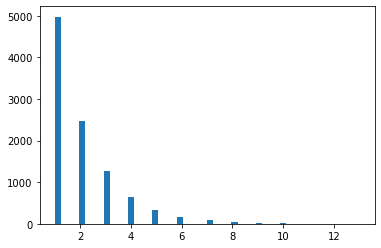

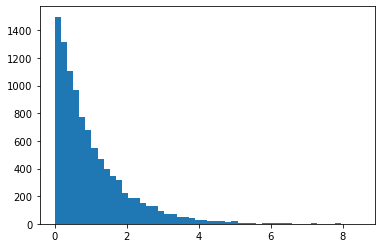

In [104]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=25)
expon_distrib=expon(scale=1).rvs(10000, random_state=25)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

NB: This analysis is inspired from this [notebook](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb).

<h1><center> Causal Inference (Assignment 2) </center></h1>

## Data Processing

In [105]:
import causalml

In [106]:
df = strat_train_set.copy()

In [107]:
df.reset_index(drop=True, inplace=True)

In [108]:
df.shape

(2342, 22)

### Variables:
Target: Life expectancy <br/>
Treatment: Schooling <br/>
Control: Everything else <br/>

In [109]:
df['Schooling_01'] = df['Schooling'].apply(lambda x: 1 if x > 12 else 0)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Schooling_01
0,Honduras,2004,Developing,72.2,165.0,5,3.02,188.249921,93.0,0,...,7.89,94.0,1.2,1217.657961,724153.0,2.6,2.5,0.571,10.4,0
1,Tunisia,2012,Developing,74.9,13.0,3,1.30,585.877676,97.0,48,...,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,14.6,1
2,China,2008,Developing,74.5,97.0,266,4.27,39.225097,95.0,131441,...,4.59,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,11.9,0
3,Mozambique,2004,Developing,54.0,429.0,82,1.54,46.581956,76.0,9396,...,5.91,83.0,15.9,336.331815,231275.0,3.9,3.8,0.332,7.0,0
4,Pakistan,2004,Developing,63.7,183.0,364,0.01,28.983231,65.0,4248,...,2.56,65.0,0.1,649.848233,15783.0,21.4,21.8,0.474,5.6,0


In [110]:
pd.Series(df['Schooling_01']).value_counts(normalize=True)

1    0.511529
0    0.488471
Name: Schooling_01, dtype: float64

In [111]:
df2 = df[['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
          'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 
          'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 
          'Income composition of resources', 'Schooling_01']]
df2.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling_01
0,2004,72.2,165.0,5,3.02,188.249921,93.0,0,42.0,7,94.0,7.89,94.0,1.2,1217.657961,724153.0,2.6,2.5,0.571,0
1,2012,74.9,13.0,3,1.30,585.877676,97.0,48,58.3,3,97.0,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,1
2,2008,74.5,97.0,266,4.27,39.225097,95.0,131441,26.5,308,99.0,4.59,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,0
3,2004,54.0,429.0,82,1.54,46.581956,76.0,9396,18.1,120,69.0,5.91,83.0,15.9,336.331815,231275.0,3.9,3.8,0.332,0
4,2004,63.7,183.0,364,0.01,28.983231,65.0,4248,18.4,461,65.0,2.56,65.0,0.1,649.848233,15783.0,21.4,21.8,0.474,0


### Remove correlation with treatment:

In [112]:
corr_matrix = df2.corr()
corr_matrix["Schooling_01"].sort_values(ascending=False)

Schooling_01                       1.000000
Income composition of resources    0.682926
Life expectancy                    0.643199
BMI                                0.520337
Alcohol                            0.440776
GDP                                0.391695
Diphtheria                         0.350810
Polio                              0.330213
percentage expenditure             0.319782
Hepatitis B                        0.205287
Year                               0.163363
Total expenditure                  0.128419
Population                        -0.050433
Measles                           -0.157859
infant deaths                     -0.213705
under-five deaths                 -0.223599
HIV/AIDS                          -0.247149
thinness 5-9 years                -0.409445
thinness  1-19 years              -0.409475
Adult Mortality                   -0.415343
Name: Schooling_01, dtype: float64

In [113]:
df2 = df2.dropna()
df2.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling_01
0,2004,72.2,165.0,5,3.02,188.249921,93.0,0,42.0,7,94.0,7.89,94.0,1.2,1217.657961,724153.0,2.6,2.5,0.571,0
1,2012,74.9,13.0,3,1.30,585.877676,97.0,48,58.3,3,97.0,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,1
2,2008,74.5,97.0,266,4.27,39.225097,95.0,131441,26.5,308,99.0,4.59,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,0
3,2004,54.0,429.0,82,1.54,46.581956,76.0,9396,18.1,120,69.0,5.91,83.0,15.9,336.331815,231275.0,3.9,3.8,0.332,0
4,2004,63.7,183.0,364,0.01,28.983231,65.0,4248,18.4,461,65.0,2.56,65.0,0.1,649.848233,15783.0,21.4,21.8,0.474,0


In [114]:
df2.shape

(1325, 20)

In [115]:
X = df2.loc[:, ~df2.columns.isin(['Schooling_01', 'Life expectancy'])]
treatment = df2['Schooling_01']
y = df2['Life expectancy']

print(X.shape)

(1325, 18)


## Experiments

In [116]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## LRS Regressor

In [117]:
# S-Learner using LinearRegression
lr = LRSRegressor()
te, lb, ub = lr.estimate_ate(X=X, treatment=treatment, y=y)
print('Average Treatment Effect (Linear Regression): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (Linear Regression): 2.67 (2.03, 3.32)


## XGBT Regressor

In [118]:
# T-Learner using XGB
xg = XGBTRegressor(random_state=42)
te, lb, ub = xg.estimate_ate(X=X, treatment=treatment, y=y)
print('Average Treatment Effect (XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

# Calling the Base Learner class and feeding in XGB
learner_t = BaseTRegressor(learner=XGBRegressor(random_state=42))
te, lb, ub = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseTRegressor class and using XGB (same result): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

# Calling the Base Learner class and feeding in LinearRegression
learner_t = BaseTRegressor(learner=LinearRegression())
te, lb, ub = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseTRegressor class and using Linear Regression (different result): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (XGBoost): 3.59 (3.35, 3.84)
Using the BaseTRegressor class and using XGB (same result): 3.59 (3.35, 3.84)
Using the BaseTRegressor class and using Linear Regression (different result): 1.18 (0.23, 2.13)


## MLPT Regressor

In [119]:
nn = MLPTRegressor(hidden_layer_sizes=(10, 10), learning_rate_init=.1, early_stopping=True, random_state=42)
te, lb, ub = nn.estimate_ate(X, treatment, y)
print('Average Treatment Effect (Neural Network (MLP)): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (Neural Network (MLP)): -109.83 (-154.86, -64.80)


## Base Regressors

In [120]:
# X Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
xl = BaseXRegressor(XGBRegressor(random_state=42))
te, lb, ub = xl.estimate_ate(X=X, treatment=treatment, y=y)
print('Average Treatment Effect (BaseXRegressor using XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

# Calling the Base Learner class and feeding in LinearRegression
xl = BaseXRegressor(LinearRegression())
te, lb, ub = xl.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseXRegressor class and using Linear Regression: {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

Average Treatment Effect (BaseXRegressor using XGBoost): 2.10 (1.96, 2.25)


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

Using the BaseXRegressor class and using Linear Regression: 1.18 (0.23, 2.13)


In [121]:
# R Learner with propensity score input
# Calling the Base Learner class and feeding in XGB
rl = BaseRRegressor(XGBRegressor(random_state=42))
te, lb, ub = rl.estimate_ate(X=X, treatment=treatment, y=y)
print('Average Treatment Effect (BaseRRegressor using XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

# Calling the Base Learner class and feeding in LinearRegression
rl = BaseRRegressor(LinearRegression())
te, lb, ub = rl.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using Linear Regression: {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

Average Treatment Effect (BaseRRegressor using XGBoost): 0.07 (0.06, 0.08)


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

Using the BaseRRegressor class and using Linear Regression: 1.13 (1.12, 1.15)


## Results

The results above show that by increasing Schooling (by 1 year) the life expectancy increases as well (1-3 years approx.). It proves there is a positive causation relationship between years of schooling and life expectancy.

## Importance Plots

In [122]:
treatment_vec = np.array(['treatment' if x==1 else 'control' for x in treatment])
slearner = BaseSRegressor(LGBMRegressor(), control_name='control')
slearner.estimate_ate(X, treatment_vec, y)
slearner_tau = slearner.fit_predict(X, treatment_vec, y)

slearner.get_importance(X=X, tau=slearner_tau, normalize=True, method='auto', features=X.columns)

{'treatment': GDP                                0.196348
 Total expenditure                  0.164249
 Adult Mortality                    0.163939
 Income composition of resources    0.134346
 HIV/AIDS                           0.068266
 BMI                                0.041344
 Alcohol                            0.035868
 infant deaths                      0.032999
 percentage expenditure             0.026097
 Population                         0.023415
 Year                               0.021196
 Diphtheria                         0.018862
 Polio                              0.017047
 under-five deaths                  0.013282
 thinness  1-19 years               0.012655
 Hepatitis B                        0.010917
 thinness 5-9 years                 0.010765
 Measles                            0.008404
 dtype: float64}

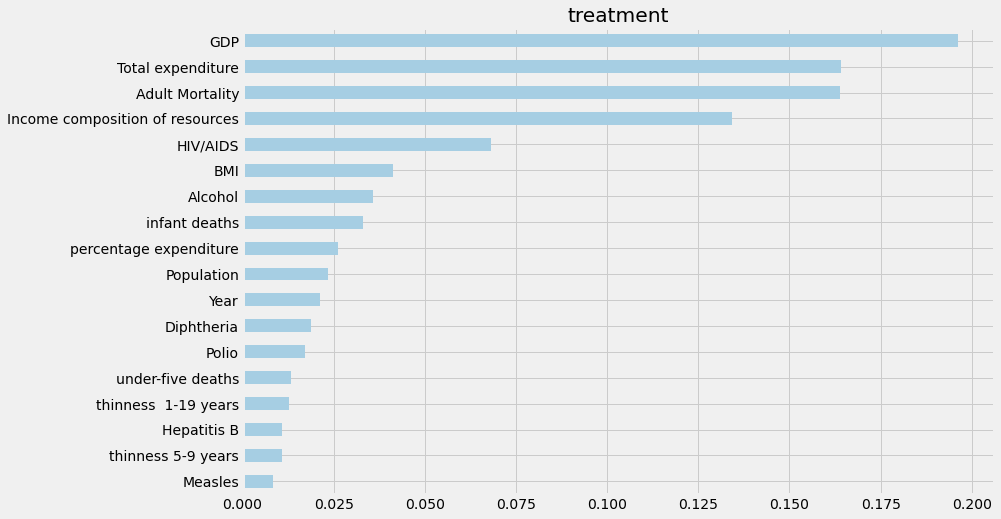

In [123]:
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='auto', features=X.columns)

In [124]:
tlearner = BaseTRegressor(learner=XGBRegressor(), control_name='control')
tlearner.estimate_ate(X, treatment_vec, y)
tlearner_tau = tlearner.fit_predict(X, treatment_vec, y)

tlearner.get_importance(X=X, tau=tlearner_tau, normalize=True, method='auto', features=X.columns)

{'treatment': Income composition of resources    0.492167
 Adult Mortality                    0.137560
 HIV/AIDS                           0.069282
 thinness  1-19 years               0.050871
 Total expenditure                  0.046785
 thinness 5-9 years                 0.041348
 Alcohol                            0.040768
 Year                               0.021293
 infant deaths                      0.014358
 BMI                                0.014316
 under-five deaths                  0.012265
 Measles                            0.010920
 percentage expenditure             0.010631
 Polio                              0.009526
 Population                         0.008955
 GDP                                0.007448
 Diphtheria                         0.006042
 Hepatitis B                        0.005464
 dtype: float64}

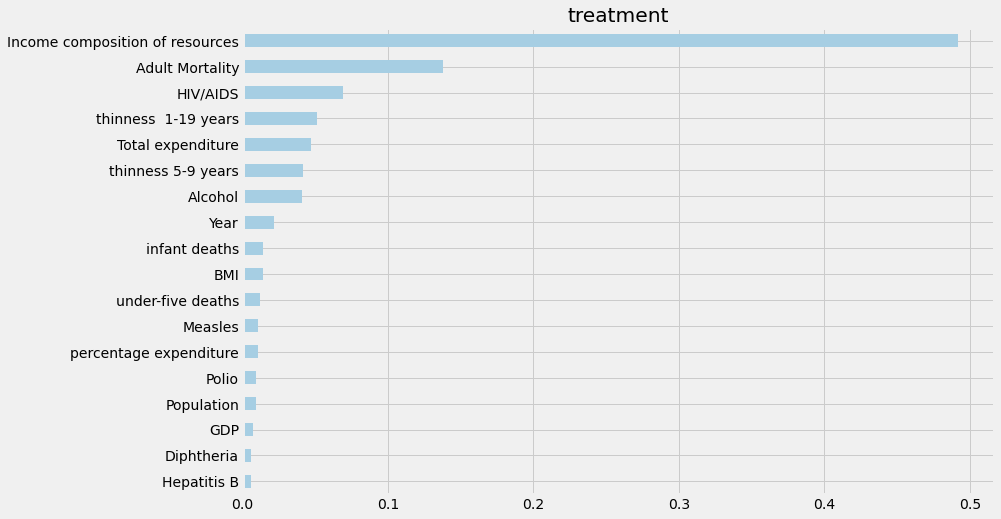

In [125]:
tlearner.plot_importance(X=X, tau=tlearner_tau, normalize=True, method='auto', features=X.columns)

## Results

The target variable is the Life expectancy in years. The treatment is the average number of years of Schooling (on a 0 to 21 scale). For the purpose of this analysis, we have created a numerical variable for the treatment that is 1 if the average years of Schooling is greater than 12 and 0 if the average years of Schooling is less than 12. 12 is not a random cutoff, it is the total average years of schooling for the entire dataset.<br/>

It is safe to conclude that 'Adult mortality' and 'Income composition of resources' are the most important features in the prediction of the treatment effect of Schooling on Life expectancy based on these S and T learners.

## DoWhy

In [126]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Avoid printing dataconversion warnings from sklearn
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'WARN',
        },
    }
}
logging.config.dictConfig(DEFAULT_LOGGING)

In [127]:
df2.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling_01
0,2004,72.2,165.0,5,3.02,188.249921,93.0,0,42.0,7,94.0,7.89,94.0,1.2,1217.657961,724153.0,2.6,2.5,0.571,0
1,2012,74.9,13.0,3,1.30,585.877676,97.0,48,58.3,3,97.0,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,1
2,2008,74.5,97.0,266,4.27,39.225097,95.0,131441,26.5,308,99.0,4.59,97.0,0.1,3471.247547,1324655.0,4.5,4.0,0.672,0
3,2004,54.0,429.0,82,1.54,46.581956,76.0,9396,18.1,120,69.0,5.91,83.0,15.9,336.331815,231275.0,3.9,3.8,0.332,0
4,2004,63.7,183.0,364,0.01,28.983231,65.0,4248,18.4,461,65.0,2.56,65.0,0.1,649.848233,15783.0,21.4,21.8,0.474,0


In [128]:
# Define causal model
# Target: life expectancy
# Treatment: schooling

model = CausalModel(data = df2,
                    treatment="Schooling_01",
                    outcome="Life expectancy",
                    common_causes=['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
                                   'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 
                                   'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 
                                   'thinness 5-9 years', 'Income composition of resources'])

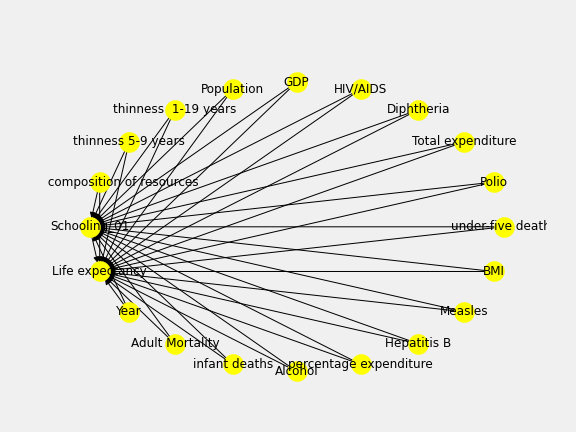

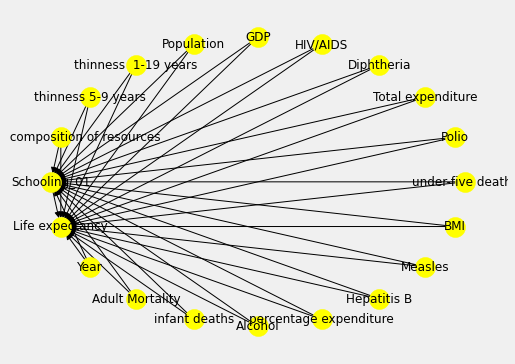

In [129]:
# View model
model.view_model() 
from IPython.display import Image, display 
display(Image(filename="causal_model.png"))

In [130]:
# Generate estimand
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(Life expectancy|Hepatitis B,Diphtheria,infant death
d[Schooling₀₁]                                                                

                                                                              
s,thinness  1-19 years,percentage expenditure,Alcohol,Income composition of re
                                                                              

                                                                              
sources,Measles,Year,GDP,thinness 5-9 years,HIV/AIDS,Total expenditure,Polio,B
                                                                              

                                                 
MI,Population,Adult Mortality,under-five deaths))
                                                 
Estimand assumption 1, Unconfoundedness:

In [131]:
# Compute causal effect using metalearner
identified_estimand_experiment = model.identify_effect(proceed_when_unidentifiable=True)

from sklearn.ensemble import RandomForestRegressor
metalearner_estimate = model.estimate_effect(identified_estimand_experiment, 
                                             method_name="backdoor.econml.metalearners.TLearner",
                                             confidence_intervals=False,
                                             method_params = {"init_params":{'models': RandomForestRegressor()}, 
                                                              "fit_params":{}})
print(metalearner_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(Life expectancy|Hepatitis B,Diphtheria,infant death
d[Schooling₀₁]                                                                

                                                                              
s,thinness  1-19 years,percentage expenditure,Alcohol,Income composition of re
                                                                              

                                                                              
sources,Measles,Year,GDP,thinness 5-9 years,HIV/AIDS,Total expenditure,Polio,B
                                                                              

                                                 
MI,Population,Adult Mortality,under-five deaths))
                                          

## Results

The average causal effect is about 3.52. This can be interpreted as, increasing the average years of schooling for a country by 1 year increases your life expectancy by 3.52 years. Noting this is the average effect, it is important to consider the full distribution of values to assess whether the average is representative.

(array([ 22., 192., 491., 288., 172.,  97.,  41.,  15.,   6.,   1.]),
 array([-5.282 , -2.5991,  0.0838,  2.7667,  5.4496,  8.1325, 10.8154,
        13.4983, 16.1812, 18.8641, 21.547 ]),
 <BarContainer object of 10 artists>)

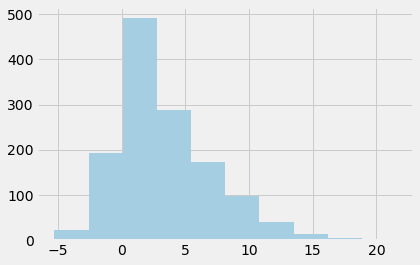

In [132]:
plt.hist(metalearner_estimate.cate_estimates)

## Results cont.

The distribution does appear a little skewed to the right, meaning the mean is not representative of the overall distribution. As such further analysis might be needed and these result need to be taken with a grain of salt.